2022-04-15 DCU Title


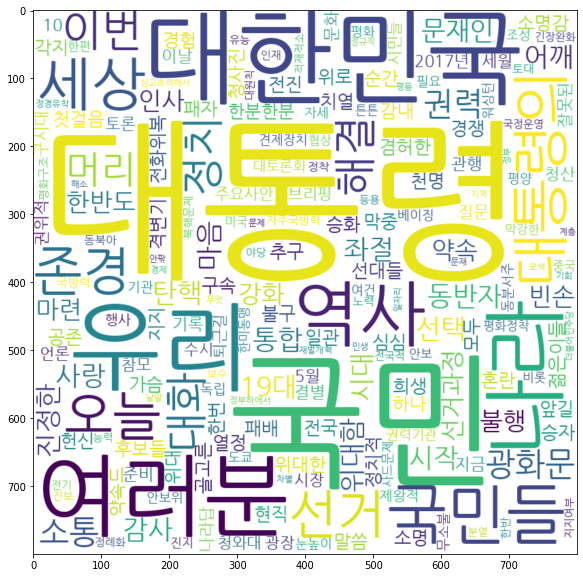

In [1]:
import pymysql
import os

# 환경변수 
MYSQL_HOST = database_url = os.environ.get('MYSQL_HOST', 'localhost')
MYSQL_PORT = database_url = os.environ.get('MYSQL_PORT', '3306')
MYSQL_USER = database_url = os.environ.get('MYSQL_USER', 'social')
MYSQL_PASSWORD = database_url = os.environ.get('MYSQL_PASSWORD', 'socialpassword')
MYSQL_DB = database_url = os.environ.get('MYSQL_DB', 'socialdb')

con = pymysql.connect(host=MYSQL_HOST,
                       port=int(MYSQL_PORT),
                       user=MYSQL_USER,
                       passwd=MYSQL_PASSWORD,
                       db=MYSQL_DB)

try:

    with con.cursor() as cur:

        # 더 복잡한 구문도 포함되게/ㅅ지
        cur.execute('SELECT * FROM news_articles')

        rows = cur.fetchall()

        for row in rows:
            print(f'{row[0]} {row[1]} {row[2]}')

finally:

    con.close()

import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

## 이 부분을 db에서 가져와야함 수집, 저장되는걸 하나의 함수로 생성
f = open("data/문재인대통령취임연설문.txt", 'r', encoding='cp949')
lines = f.readlines()
f.close()

# 한나눔 형태소 분석기로 명사만 추출
# 한국어 분석을 할 때는 명사 추출 분석이 가장 일반적임
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(10)               

from wordcloud import WordCloud
from collections import Counter

# 폰트 경로 설정
#font_path = 'C:/Windows/Fonts/malgun.ttf'
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

2022-04-15 DCU Title


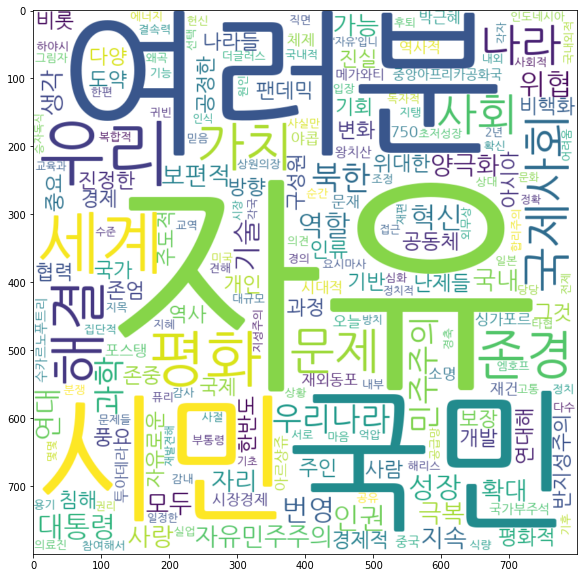

In [3]:
import pymysql
import os

# 환경변수 
MYSQL_HOST = database_url = os.environ.get('MYSQL_HOST', 'localhost')
MYSQL_PORT = database_url = os.environ.get('MYSQL_PORT', '3306')
MYSQL_USER = database_url = os.environ.get('MYSQL_USER', 'social')
MYSQL_PASSWORD = database_url = os.environ.get('MYSQL_PASSWORD', 'socialpassword')
MYSQL_DB = database_url = os.environ.get('MYSQL_DB', 'socialdb')

con = pymysql.connect(host=MYSQL_HOST,
                       port=int(MYSQL_PORT),
                       user=MYSQL_USER,
                       passwd=MYSQL_PASSWORD,
                       db=MYSQL_DB)

try:

    with con.cursor() as cur:

        # 더 복잡한 구문도 포함되게/ㅅ지
        cur.execute('SELECT * FROM news_articles')

        rows = cur.fetchall()

        for row in rows:
            print(f'{row[0]} {row[1]} {row[2]}')

finally:

    con.close()

import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

## 이 부분을 db에서 가져와야함 수집, 저장되는걸 하나의 함수로 생성
f = open("data/윤석열대통령취임연설문.txt", 'r', encoding='UTF8')
lines = f.readlines()
f.close()

# 한나눔 형태소 분석기로 명사만 추출
# 한국어 분석을 할 때는 명사 추출 분석이 가장 일반적임
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(10)               

from wordcloud import WordCloud
from collections import Counter

# 폰트 경로 설정
#font_path = 'C:/Windows/Fonts/malgun.ttf'
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')